In [92]:
# Create a function to open and read in daily mean temperature for NYC Central Park (2010) from a
# .txt file. Using the readlines command to make the output a list. (Exercise #1)
def read_text(file):
    with open(file, 'r') as data:
        sat = data.readlines()
    return sat

In [93]:
# First import math in Python to use trig functions and pi (to use in Exercise #2)
import math

# Create a new function (lsq_fit) to calculate the model values and residual values, using the equations given
    # Function to compute y(t) and residuals (section added for Exercise #2 (02/21))
def lsq_fit (sat_nyc_2010):
    y_0 = 55.0 # degrees Fahrenheit
    A = 25.0 # degrees Fahrenheit
    t_0 = 200.0 # days
    T = 365.0 # days
    
    model_values = []
    residual_values = []
    # Create a for loop to calculate the model value and residual value for each data point in the given dataset
    for t in range(1, 366):
        model_value = y_0 + A * math.cos(2 * math.pi * (t - t_0) / T)
        residual = model_value - sat_nyc_2010[t-1]  # Adjust for Python's 0-based indexing
        # Append the calculated values to make 2 lists
        model_values.append(model_value)
        residual_values.append(residual)

    return model_values, residual_values

In [94]:
# Print the observed NYC temperature to the screen (updated for Exercise #2 (02/21))
def print_data(day_of_year, sat_nyc_2010, model_values, residual_values):
    print("{:<28} {:<28} {:<28} {:<28}".format("Day of Year (1-365)", "Observed Temperatures (\xb0F)", "Model Temperature Value (\xb0F)", "Residual (\xb0F)"))

    for day, obs, model, residual in zip(day_of_year, sat_nyc_2010, model_values, residual_values):
        print("{:<28} {:<28.1f} {:<28.1f} {:<28.1f}".format(day, obs, model, residual))

In [95]:
# For Exercise #3, we will plot the observed temperature with the day of year, as well as the residual values with the day
# of the year using a 'plot_ts' function
import matplotlib.pyplot as plt

def plot_ts(day_of_year, sat_nyc_2010, model_values, residual_values):

    plt.figure(figsize = (10, 8))
    # Top/first subplot: plotting observed data and modeled values with the days of the year
    plt.subplot(2, 1, 1)
    # Plot the correct x and y data sets and specify labels, color, and data marker
    plt.plot(day_of_year, sat_nyc_2010, label = 'Observations', color = 'blue', marker = 'o')
    plt.plot(day_of_year, model_values, label = 'Pre-fit Model Values', color = 'orange', linestyle = '--')
    # Label the x-axis
    plt.xlabel('Day of Year (1-365)')
    # Label the y-axis
    plt.ylabel('Temperature (°F)')
    # Title the subplot
    plt.title('NYC Temperature Observations vs. Pre-fit Model Values over Day or Year')
    plt.legend()

    # Bottom/second subplot: plotting the residual values with the days of the year
    plt.subplot(2, 1, 2)
     # Plot the correct x and y data sets and specify labels, color, and data marker
    plt.plot(day_of_year, residual_values, label = 'Residual Valuess', color = 'green', marker = 'o')
    plt.axhline(0, color = 'red', linestyle = '--', linewidth = 1)  # Reference line at y=0
    # Label the x-axis
    plt.xlabel('Day of Year (1-365)')
    # Label the y-axis
    plt.ylabel('Pre-fit Residual Values (°F)')
    # Title the subplot
    plt.title('Pre-fit Residuals Values over Day of Year')
    plt.tight_layout()

    # Save the figure as "Figure1.pdf"
    plt.savefig('Figure1.pdf')
    # Show the plot to the screen
    plt.show()

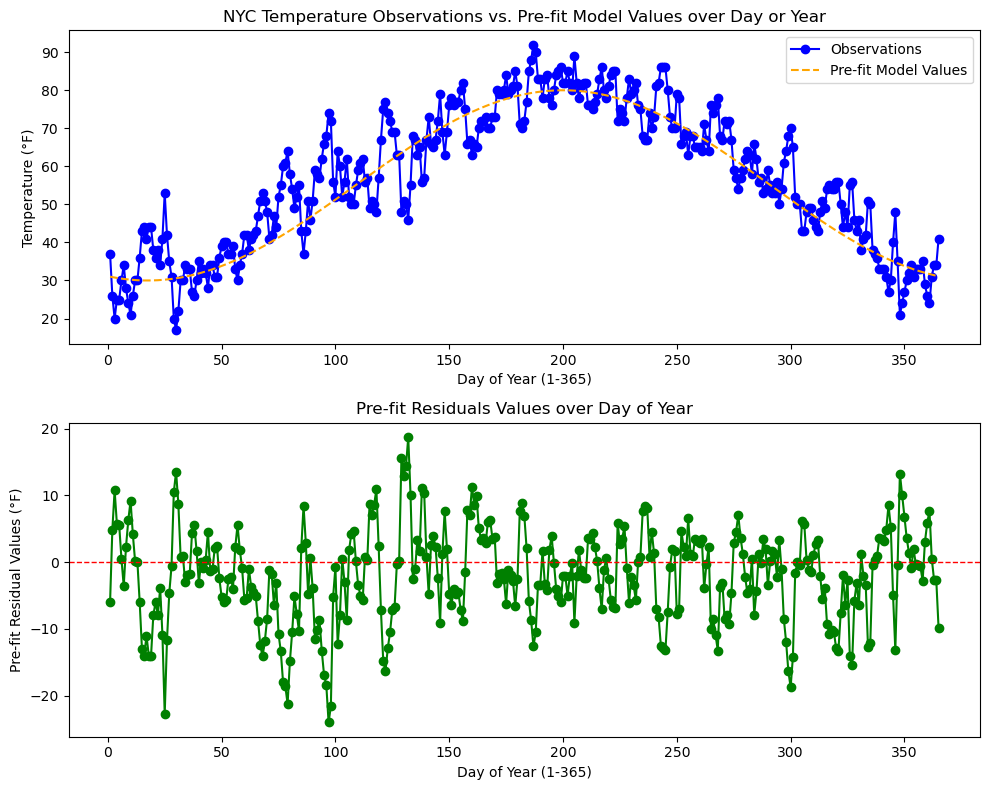

In [96]:
# Main Routine (updated for Exercise #3 (02/28))

# Specify the file name:
file_text = 'nyc_temp_2010.txt'
    # this text file contains the daily mean temperatures for NYC Central Park (2010)

# Now call the functions (read and print):
sat_nyc_2010 = read_text(file_text)
    # this function is passed the file name, reads in the temperature data, and returns the data

# Convert to integers
sat_nyc_2010 = [int(i) for i in sat_nyc_2010]


# Generate day_of_year list (1 to 365)
day_of_year = list(range(1, 366))

# Obtain pre-fit model values and residuals
pre_fit_model_values, pre_fit_residuals = lsq_fit(sat_nyc_2010)

# Print the data, now including pre-fit model values (3) and residuals (4) in addition to days of year (1) and observed
# temperatures (2) from Exercise #1 (02/14).
#print_data(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals)
    # this null function is passed the temperature data. The function prints to the screen four columns with headers:
        # - one column indicating the day of the year (1-365),
        # - and a second column indicating the temperature observation for each day.
    # Be sure to indicate the units of the temperature data (°F)
# Call the plotting (time-series) function and display/save the figure (for Exercise #3)
plot_ts(day_of_year, sat_nyc_2010, pre_fit_model_values, pre_fit_residuals)